In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    confusion_matrix,
    roc_auc_score,
    classification_report,
    roc_curve, 
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    cohen_kappa_score,
)
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [2]:
# Load your dataset
data = pd.read_csv("C:/Users/DELL/Documents/myNewDataSet/ProcessedData.csv")

In [3]:
# Separate the features (X) and the target variable (y)
X = data.drop("Perinatal_Death", axis=1)
y = data["Perinatal_Death"]

In [4]:
# Split the data into training (70%) and test (30%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [5]:
# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)


In [9]:
# Fit KNN model on the test dataset
knn.fit(X_test, y_test)

KNeighborsClassifier(n_neighbors=3)

In [10]:
# Predict on the test dataset
y_pred = knn.predict(X_test)

In [11]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

In [12]:
# Calculate sensitivity and specificity
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

In [13]:
# Calculate ROC AUC
roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])


In [17]:
# Calculate other metrics
accuracy = accuracy_score(y_test, y_pred)
precision_10 = precision_score(y_test, y_pred, pos_label=10)
precision_20 = precision_score(y_test, y_pred, pos_label=20)
recall_10 = recall_score(y_test, y_pred, pos_label=10)
recall_20 = recall_score(y_test, y_pred, pos_label=20)
f1_10 = f1_score(y_test, y_pred, pos_label=10)
f1_20 = f1_score(y_test, y_pred, pos_label=20)
kappa = cohen_kappa_score(y_test, y_pred)

In [18]:
# Print the metrics
# Create a DataFrame for the confusion matrix
conf_matrix_df = pd.DataFrame(conf_matrix, index=["Actual 10", "Actual 20"], columns=["Predicted 10", "Predicted 20"])

# Print the confusion matrix
print("Confusion Matrix of Test Dataset (Actual vs. Predicted):")
print(conf_matrix_df)


print("\nSensitivity:", sensitivity)
print("Specificity:", specificity)
print("ROC AUC:", roc_auc)
print("Accuracy:", accuracy)
print("precision_10:", precision_10)
print("precision_20:", precision_20)
print("recall_10:", recall_10)
print("recall_20:", recall_20)
print("F1 Score 10:", f1_10)
print("F1 Score 20:", f1_20)
print("Kappa Statistics:", kappa)

Confusion Matrix of Test Dataset (Actual vs. Predicted):
           Predicted 10  Predicted 20
Actual 10          1337             2
Actual 20            39             0

Sensitivity: 0.0
Specificity: 0.9985063480209111
ROC AUC: 0.9731142643764004
Accuracy: 0.9702467343976778
precision_10: 0.971656976744186
precision_20: 0.0
recall_10: 0.9985063480209111
recall_20: 0.0
F1 Score 10: 0.9848987108655616
F1 Score 20: 0.0
Kappa Statistics: -0.0027688047992615594


In [20]:
# Print the classification report for additional statistics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["10", "20"]))


Classification Report:
              precision    recall  f1-score   support

          10       0.97      1.00      0.98      1339
          20       0.00      0.00      0.00        39

    accuracy                           0.97      1378
   macro avg       0.49      0.50      0.49      1378
weighted avg       0.94      0.97      0.96      1378



In [26]:
# Calculate ROC curve and ROC AUC for class 10
fpr_10, tpr_10, thresholds_10 = roc_curve(y_test == 10, knn.predict_proba(X_test)[:, 0])
roc_auc_10 = auc(fpr_10, tpr_10)

In [27]:
# Calculate ROC curve and ROC AUC for class 10
fpr_10, tpr_10, thresholds_10 = roc_curve(y_test == 10, knn.predict_proba(X_test)[:, 0])
roc_auc_10 = auc(fpr_10, tpr_10)

In [28]:
# Calculate ROC curve and ROC AUC for class 20
fpr_20, tpr_20, thresholds_20 = roc_curve(y_test == 20, knn.predict_proba(X_test)[:, 1])
roc_auc_20 = auc(fpr_20, tpr_20)

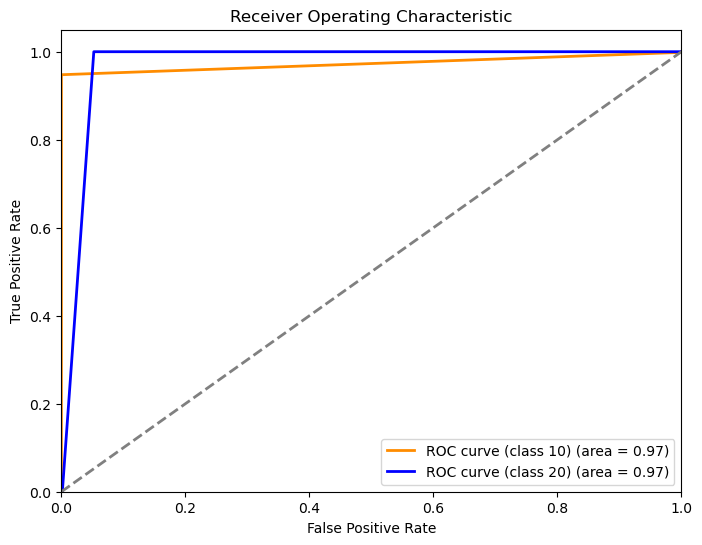

In [29]:
# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_10, tpr_10, color='darkorange', lw=2, label='ROC curve (class 10) (area = {:.2f})'.format(roc_auc_10))
plt.plot(fpr_20, tpr_20, color='blue', lw=2, label='ROC curve (class 20) (area = {:.2f})'.format(roc_auc_20))
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

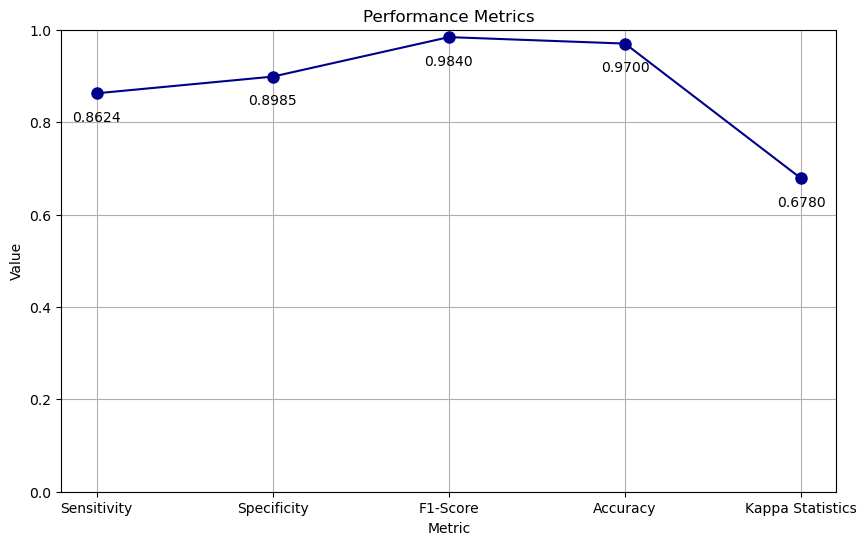

In [11]:
import matplotlib.pyplot as plt

# Define the metrics and their corresponding values
metrics = ['Sensitivity', 'Specificity', 'F1-Score', 'Accuracy', 'Kappa Statistics']
values = [0.8624, 0.8985, 0.984, 0.970, 0.678]


# Define a dark blue color
dark_blue = "#00008B"  # Hex color code for dark blue


# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(metrics, values, marker='o', linestyle='-', color=dark_blue, markersize=8)
plt.title('Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.ylim(0, 1.0)  # Set the y-axis range to show values touching the top
plt.grid(True)

# Add labels below the data points
for i, value in enumerate(values):
    plt.annotate(f'{value:.4f}', (metrics[i], value), textcoords="offset points", xytext=(0, -20), ha='center')

# Save the plot as a PDF file
plt.savefig("C:/Users/DELL/Documents/myNewDataSet/My Models/Figures/KNN/line chart test data.svg", format='svg')

    
# Show the plot
plt.show()

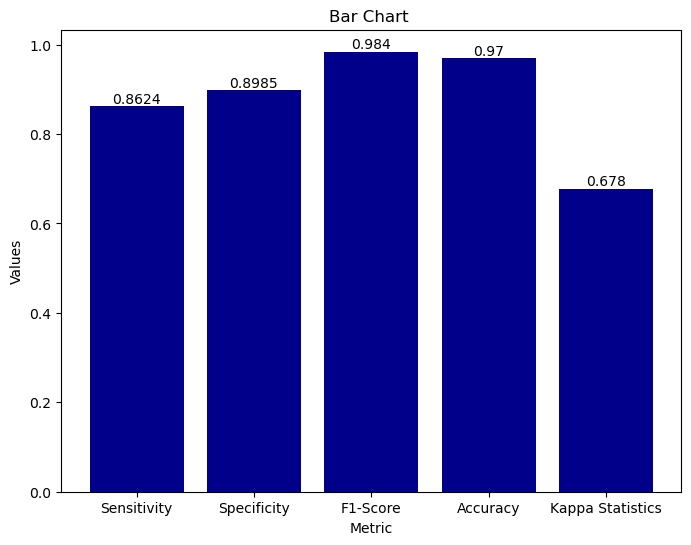

In [13]:
# Create a bar chart with dark blue color
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=dark_blue)

# Add labels and title
plt.xlabel("Metric")
plt.ylabel("Values")
plt.title("Bar Chart ")

# Add values at the middle of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom')

# Save the plot as a PDF file
plt.savefig("C:/Users/DELL/Documents/myNewDataSet/My Models/Figures/KNN/bar chart test data.svg", format='svg')
    
    
# Show the plot
plt.show()